In [2]:
import rasterio
import rioxarray

In [3]:
initIndex=0
lastIndex=1024
austria_tile = rioxarray.open_rasterio('data\AustriaHugeImage.tif',chunks={"x":256, "y":256})
austria_tile.plot.imshow(figsize=(8,8))
# with open("data\AustriaHugeImage.tif", encoding="charmap") as fin:
#     fin.seek(initIndex)
#     data = fin.read(1024 - initIndex)
#     print(data)
#Looks like it does work

Do not forget to install manually the openslide bynaries from its official page
https://openslide.org/download/
import sys
for p in sys.path:
    print(p)

In [2]:
import sys
for p in sys.path:
    print(p)

t:\Python projects\TU-InstituteofTransportSciences
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\python310.zip
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\DLLs
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310

c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages\win32
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages\win32\lib
c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages\Pythonwin


In [15]:
# The path can also be read from a config file, etc.
OPENSLIDE_PATH_LOCAL ="C:/Users/jcarvajal/AppData/Local/Programs/Python/Python310/lib/site-packages/openslide/openslide-win64-20220811/bin"
OPENSLIDE_PATH_REMOTE ="C:/Python/Python39/lib/site-packages/openslide/openslide-win64-20220811/bin"

import os
if hasattr(os, 'add_dll_directory'):
    # Python >= 3.8 on Windows
    with os.add_dll_directory(OPENSLIDE_PATH_LOCAL):
        import openslide
else:
    import openslide

from openslide import open_slide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff


In [17]:
huge_image = open_slide("data\AustriaHugeImage.tif")
huge_image_props= huge_image.properties
print(huge_image_props)

<_PropertyMap {'openslide.level-count': '9', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '250000', 'openslide.level[0].tile-height': '256', 'openslide.level[0].tile-width': '256', 'openslide.level[0].width': '250000', 'openslide.level[1].downsample': '2', 'openslide.level[1].height': '125000', 'openslide.level[1].tile-height': '256', 'openslide.level[1].tile-width': '256', 'openslide.level[1].width': '125000', 'openslide.level[2].downsample': '4', 'openslide.level[2].height': '62500', 'openslide.level[2].tile-height': '256', 'openslide.level[2].tile-width': '256', 'openslide.level[2].width': '62500', 'openslide.level[3].downsample': '8', 'openslide.level[3].height': '31250', 'openslide.level[3].tile-height': '256', 'openslide.level[3].tile-width': '256', 'openslide.level[3].width': '31250', 'openslide.level[4].downsample': '16', 'openslide.level[4].height': '15625', 'openslide.level[4].tile-height': '256', 'openslide.level[4].tile-width': '256', 'openslide.level[

In [19]:
huge_image_dim = huge_image.dimensions
print(huge_image_dim)

(250000, 250000)


In [5]:
huge_image_thumb = huge_image.get_thumbnail(size=(600,600))
huge_image_thumb.show()

In [4]:
#Convert the thumbnail to a numpy arra
huge_image_thumb_np= np.array(huge_image_thumb )
plt.figure(figsize=(20,20))
plt.imshow(huge_image_thumb_np, origin="lower")

NameError: name 'huge_image_thumb' is not defined

In [6]:
huge_image_dimensions = huge_image.level_dimensions

In [7]:
dims= huge_image.level_dimensions
level3_dim = dims[4]
level3_img = huge_image.read_region((0,0),2,level3_dim)
level3_img_rgb = level3_img.convert("RGB")
level3_img_rgb.show()

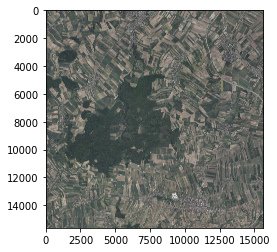

In [10]:
#Convert rgb to numpy array

level3_img_np = np.array(level3_img_rgb)
plt.imshow(level3_img_np)

For the moment we could open and manage the image, we get his dimensions, basically each one is the half dim of the before, but that way we llooss a lot of data and resolution
So now we have to read it by tiles, we will use deepyoom, an function of openslide lib

In [20]:
from openslide.deepzoom import DeepZoomGenerator


In [21]:
tiles = DeepZoomGenerator(huge_image, tile_size=4096, overlap=0, limit_bounds=True)

In [22]:
print(tiles.level_count)
print(tiles.level_dimensions)
print(tiles.tile_count)

19
((1, 1), (2, 2), (4, 4), (8, 8), (16, 16), (31, 31), (62, 62), (123, 123), (245, 245), (489, 489), (977, 977), (1954, 1954), (3907, 3907), (7813, 7813), (15625, 15625), (31250, 31250), (62500, 62500), (125000, 125000), (250000, 250000))
5158


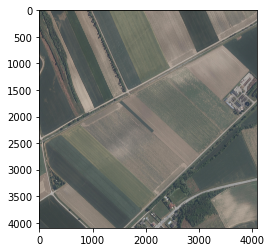

In [24]:
single_tile = tiles.get_tile(18,(0,0))
single_tile_rgb = single_tile.convert("RGB")
single_tile_rgb.show()
single_tile = np.array(single_tile_rgb)
plt.imshow(single_tile)

Save each tile in filesystem

In [15]:
cols, rows = tiles.level_tiles[16]

In [7]:
#All the tiles were created
import os
tiles_dir = "tiles/"
for row in range(0,1):
    for col in range(0,1):
        tile_name = os.path.join(tiles_dir, '%d_%d' % (col, row))
        print("Now saving tile with title: ", tile_name)
        temp_tile = tiles.get_tile(18, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        #Save original tile
        tiff.imsave(tile_name + "_copy.tif", temp_tile_np)

Now saving tile with title:  tiles/0_0


C:\Users\jcarvajal\AppData\Local\Temp\ipykernel_11252\2544770440.py:12: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(tile_name + "_copy.tif", temp_tile_np)


In [83]:
#ry to set crs data in the tif tiles
import rasterio
import geopandas as gpd
tiles_dir = "tiles/"
tile_name = os.path.join(tiles_dir, '%d_%d' % (0, 1))
print("Now saving tile with title: ", tile_name)
temp_tile = tiles.get_tile(18, (0, 1))
temp_tile_RGB = temp_tile.convert('RGB')
temp_tile_np = np.array(temp_tile_RGB)
'''
#Save original tile
tiff.imsave(tile_name + "_PandasTest.tif", temp_tile_np)
'''

Now saving tile with title:  tiles/0_1


'\n#Save original tile\ntiff.imsave(tile_name + "_PandasTest.tif", temp_tile_np)\n'

In [58]:
#######################################################New way by using GDAL licenced library
from osgeo import gdal
filepath="data\AustriaHugeImage.tif"
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
type(raster)

osgeo.gdal.Dataset

In [5]:
import rioxarray

rds = rioxarray.open_rasterio('filewithcrs.tif')

#rds = rds.rio.write_crs("EPSG:3035")
rds.rio.crs



CRS.from_epsg(3035)

In [3]:

rds.rio.to_raster("filewithcrs.tif")

c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
